# Project overview: 
In this project we will be performing Exploratory Data Analysis on a dataset for a bike sharing company based in Chicago. The company has two types of riders-

- Member riders - Customer who purchase annual subscription.
- Casual riders - Customers who purchase single-ride or full day passes.

The director of marketing believes the company's future success depends on maximizing the number of annual memberships. Therefore, our goal is to understand how casual riders and annual members use Cyclistic bikes differently. 

### Business task:
The goal of this project is to understand the differences between casual riders and annual members, report key findings to stakeholders, and propose solutions to help the marketing team convert casual riders into annual members.
    

# Preparing Data for Analysis

#### Download the data and store it appropriately

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
colors = ["#F8766D", "#619CFF", "#00BA38"]
custom_params = {"axes.spines.right": False,
                 "axes.spines.top": False,
                 "axes.spines.left": False,
                 "axes.spines.bottom": False}
sns.set_theme(style="white", rc=custom_params,
             palette=colors)
plt.rcParams['xtick.labelsize'] = 8
plt.rcParams['ytick.labelsize'] = 8
import datetime as dt
import glob
import folium
import os
import warnings
warnings.filterwarnings('ignore')

In [2]:
directory = 'input_data'
files = [f for f in os.listdir(directory) if f.endswith('.csv')]
sorted_files = sorted(files) 

dataframes = []

for file in sorted_files:
    file_path = os.path.join(directory, file)
    df = pd.read_csv(file_path)
    dataframes.append(df)

# Concatenate all DataFrames at once
data = pd.concat(dataframes, ignore_index=True)

#### Identify how the data is organized

In [3]:
data

,ride_id,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
0,A847FADBBC638E45,docked_bike,2020-04-26 17:45:14,2020-04-26 18:12:03,Eckhart Park,86,Lincoln Ave & Diversey Pkwy,152.0,41.896400,-87.661000,41.932200,-87.658600,member
1,5405B80E996FF60D,docked_bike,2020-04-17 17:08:54,2020-04-17 17:17:03,Drake Ave & Fullerton Ave,503,Kosciuszko Park,499.0,41.924400,-87.715400,41.930600,-87.723800,member
2,5DD24A79A4E006F4,docked_bike,2020-04-01 17:54:13,2020-04-01 18:08:36,McClurg Ct & Erie St,142,Indiana Ave & Roosevelt Rd,255.0,41.894500,-87.617900,41.867900,-87.623000,member
3,2A59BBDF5CDBA725,docked_bike,2020-04-07 12:50:19,2020-04-07 13:02:31,California Ave & Division St,216,Wood St & Augusta Blvd,657.0,41.903000,-87.697500,41.899200,-87.672200,member
4,27AD306C119C6158,docked_bike,2020-04-18 10:22:59,2020-04-18 11:15:54,Rush St & Hubbard St,125,Sheridan Rd & Lawrence Ave,323.0,41.890200,-87.626200,41.969500,-87.654700,casual
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3489743,9397BDD14798A1BA,docked_bike,2021-03-20 14:58:56,2021-03-20 17:22:47,Michigan Ave & Oak St,13042,New St & Illinois St,TA1306000013,41.900960,-87.623777,41.890847,-87.618617,casual
3489744,BBBEB8D51AAD40DA,classic_bike,2021-03-02 11:35:10,2021-03-02 11:43:37,Kingsbury St & Kinzie St,KA1503000043,New St & Illinois St,TA1306000013,41.889177,-87.638506,41.890847,-87.618617,member
3489745,637FF754DA0BD9E1,classic_bike,2021-03-09 11:07:36,2021-03-09 11:49:11,Michigan Ave & Oak St,13042,Clark St & Berwyn Ave,KA1504000146,41.900960,-87.623777,41.977997,-87.668047,member
3489746,F8F43A0B978A7A35,classic_bike,2021-03-01 18:11:57,2021-03-01 18:18:37,Kingsbury St & Kinzie St,KA1503000043,New St & Illinois St,TA1306000013,41.889177,-87.638506,41.890847,-87.618617,member


The dataset has a total of 13 columns:

- ride_id: The id of the ride.
- rideable_type: Categorical column specifying the type of bike(electric, docked, classic)
- started_at: Time at which the ride started
- ended_at: Time at which the ride ended
- start_station_name: Name of the station where the ride started
- start_station_id: Id of the station where the ride started
- end_station_name: Name of the station where the ride ended
- end_station_id: Id of the station where the ride ended
- start_lat: latitude of ride's starting location
- start_lng: longitude of ride's starting location
- end_lat: latitude of ride's ending location
- end_lng: latitude of ride's ending location
- member_casual: Categorical column specifying the type of customer(member, casual)

#### Determine the credibility of the data

The data is public and is made available by Motivate International Inc. It has a lot of rows(3 million approximately), which is a good thing. Overall, the condition of the data seems to be good.

#### Clean and tranform the data

In [4]:
# Check for NULL values

null_values = data.isnull().sum() * 100 / len(data)
null_values

ride_id               0.000000
rideable_type         0.000000
started_at            0.000000
ended_at              0.000000
start_station_name    3.500969
start_station_id      3.518907
end_station_name      4.104652
end_station_id        4.117862
start_lat             0.000000
start_lng             0.000000
end_lat               0.135769
end_lng               0.135769
member_casual         0.000000
dtype: float64

As we can see above, the data has 6 columns with null values. The columns start_station_id and end_station_id are not of much use to us, so we will drop them.

In [5]:
# Remove irrelevant columns

data = data.drop('start_station_id', axis=1)
data = data.drop('end_station_id', axis=1)

The columns end_lat and end_lng have very few null values, so we can remove those rows.

In [6]:
# Drop NULL values

data = data.dropna(subset=["end_lat", "end_lng"])

The columns start_station_name and end_station_name has about 4% null values, so we can't drop the rows. We will replace  them with the string 'not known'.

In [7]:
# Fill NULL values

data["start_station_name"] = data["start_station_name"].fillna("not known")
data["end_station_name"] = data["end_station_name"].fillna("not known")

In [8]:
data.isnull().sum() * 100 / len(data)

ride_id               0.0
rideable_type         0.0
started_at            0.0
ended_at              0.0
start_station_name    0.0
end_station_name      0.0
start_lat             0.0
start_lng             0.0
end_lat               0.0
end_lng               0.0
member_casual         0.0
dtype: float64

As we can see above, now our data is free of missing values. The next step is to check the data for duplicates

In [9]:
# Check for duplicate rows

data[data.duplicated() == 1]

,ride_id,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual


There are no duplicate rows in the data.

In [10]:
data.nunique()

ride_id               3484802
rideable_type               3
started_at            3036555
ended_at              3024365
start_station_name        709
end_station_name          707
start_lat              248425
start_lng              243202
end_lat                276196
end_lng                262519
member_casual               2
dtype: int64

There are two categorical columns in the data. We will convert them to 'category' datatype so save some memory. We will also convert the columns started_at and ended_at to 'datetime'.

In [11]:
# Convert data types
data["started_at"] = pd.to_datetime(data["started_at"],
                                    format="%Y-%m-%d %H:%M:%S")
data["ended_at"] = pd.to_datetime(data["ended_at"],
                                  format="%Y-%m-%d %H:%M:%S")

data["rideable_type"] = data["rideable_type"].astype("category")
data["member_casual"] = data["member_casual"].astype("category")

Now, we will create two new columns, trip_duration and trip_duration_min that represent the duration of each trip.

In [12]:
# Add columns and remove incorrect data
data['trip_duration'] = data['ended_at'] - data['started_at']
data['trip_duration_min'] = (
    data['trip_duration'].dt.total_seconds()
)/60

Finally, we will remove the rows in which the ended_at column is less than or equal to started_at. Now, our data is ready for analysis.

In [13]:
data = data.drop(data[data['ended_at'] <= data['started_at']].index)

# Exploratory Data Analysis

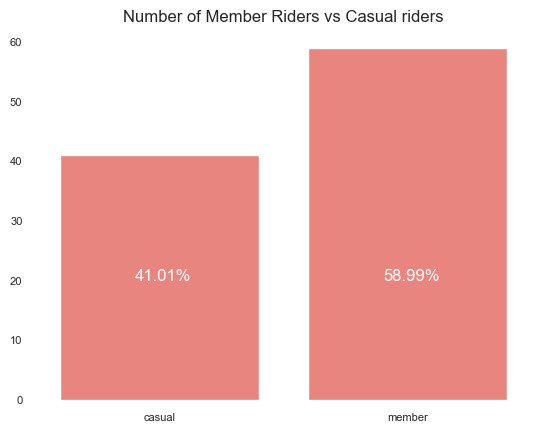

In [14]:
proportions = data['member_casual'].value_counts(normalize=True).reset_index()
proportions.columns = ['member_casual', 'proportion']
proportions['proportion'] = (proportions['proportion'] * 100).round(2)
ax = sns.barplot(x='member_casual', y='proportion', data=proportions)
x = [0.9, -0.1]
for i in range(2):
    ax.text(x[i], 20, proportions['proportion'][i].astype(str)+'%', color='white')
plt.title('Number of Member Riders vs Casual riders')
plt.xlabel("")
plt.ylabel(""); 

We can see above that 59% of the riders are annual members while 41% of the riders are casual riders.

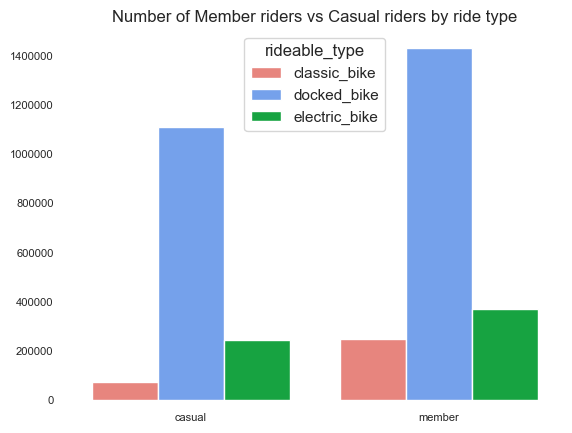

In [15]:
ax = sns.countplot(x='member_casual', hue='rideable_type', data=data)
plt.title('Number of Member riders vs Casual riders by ride type')
plt.xlabel("")
plt.ylabel("")
plt.ticklabel_format(style='plain', useOffset=False, axis='y')


If we group number of member and casual riders by ride type, we see that both member and casual riders follow the same trend. Most riders prefer docked bike for both member and
casual riders, followed by electric bike, followed by classic bike.

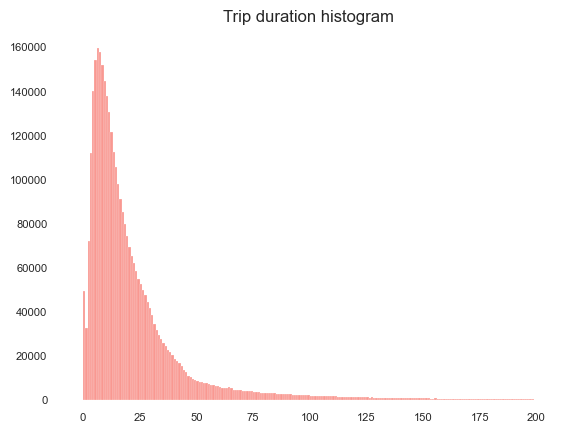

In [16]:
bins = np.arange(0, 200, 1)
sns.histplot(data=data, x='trip_duration_min', bins=bins)
plt.title('Trip duration histogram')
plt.xlabel("")
plt.ylabel("");

The histogram above shows us that the trip duration are heavily skewed to the right. We will perform log tranformation to the trip duration to make
the data resemble the normal distribution more.

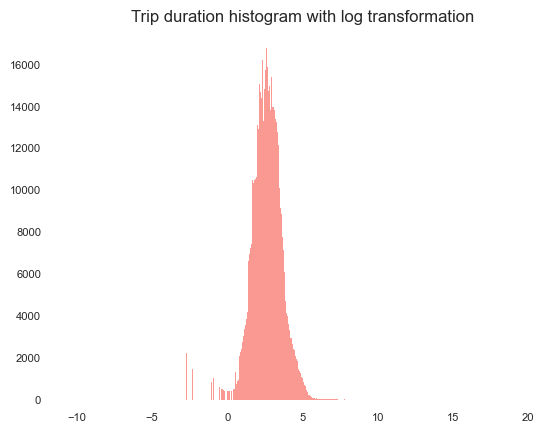

In [17]:
data['trip_duration_min_log'] = np.log(data['trip_duration_min'])
bins = np.arange(-10, 20, 0.01)
sns.histplot(data=data, x='trip_duration_min_log', bins=bins)
plt.title('Trip duration histogram with log transformation')
plt.xlabel("")
plt.ylabel("");

Now our data is much more evenly distributed. We can now go ahead and calculate the average trip duration.

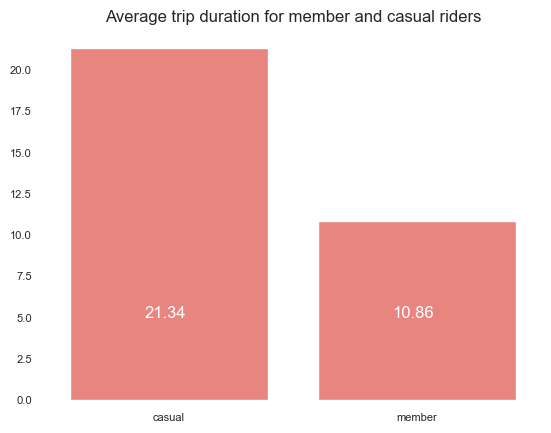

In [18]:
geo_means = data.groupby('member_casual')['trip_duration_min_log'].mean()
geo_means = np.exp(geo_means).round(2).reset_index()
ax = sns.barplot(x='member_casual', y='trip_duration_min_log', data=geo_means)
x = [-0.1, 0.9]
for i in range(2):
    ax.text(x[i], 5, geo_means['trip_duration_min_log'][i], color='white')
plt.title('Average trip duration for member and casual riders')
plt.xlabel("")
plt.ylabel("");

The mean trip duration for member riders is 10.86 and the mean trip duration for casual riders is 21.24 min which is almost twice as much.

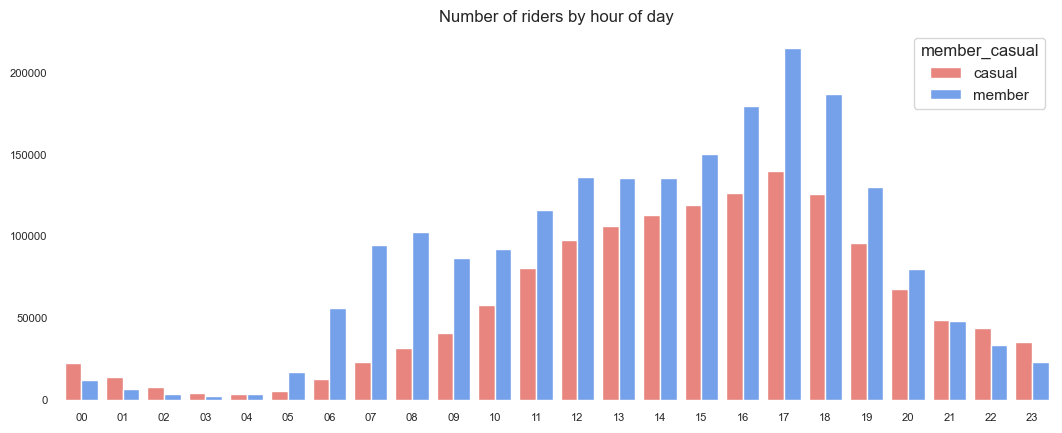

In [19]:
hourly_riders = data.groupby(['member_casual', 
                              data['started_at'].dt.strftime('%H')], 
                             observed=True).size().to_frame('count')
hourly_riders = hourly_riders.reset_index()

plt.figure(figsize=(12.8, 4.8))
sns.barplot(x='started_at', 
            y='count', 
            data=hourly_riders, 
            hue='member_casual');

plt.title('Number of riders by hour of day')
plt.xlabel("")
plt.ylabel("");

The number of rides booked are the highest at around 5 in the evening for both member and casual riders.

The average daily riders for member and casual riders is 5645.55 and 3925.06 respectively.

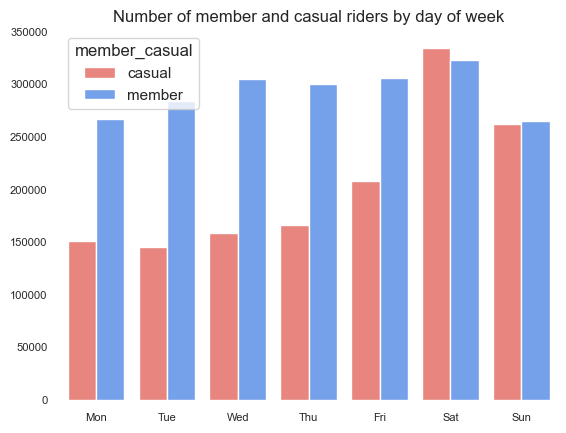

In [20]:
weekly_riders = data.groupby(['member_casual', 
                              data['started_at'].dt.strftime('%a')], 
                             observed=True).size().to_frame('count')

weekly_riders = weekly_riders.reset_index()

ord = ['Mon', 'Tue', 'Wed',
       'Thu', 'Fri', 'Sat',
       'Sun']

g = sns.barplot(x='started_at', 
            y='count', 
            data=weekly_riders, 
            hue='member_casual',
            order=ord);

plt.title('Number of member and casual riders by day of week')
plt.xlabel("")
plt.ylabel("");

Number of rides for casual riders are higher on weekends(friday to sunday) and lower on weekdays(monday to thursday). Number of rides for member riders stay pretty much the same
throughout the week.

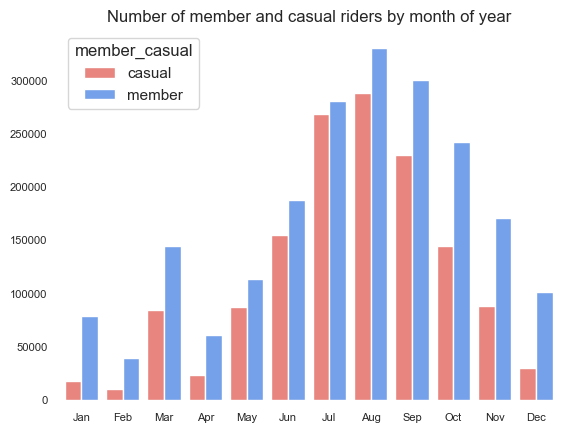

In [21]:
monthly_riders = data.groupby(['member_casual',
                               data['started_at'].dt.strftime('%b')],
                              observed=True).size().to_frame('count')

monthly_riders = monthly_riders.reset_index()

ord = ['Jan', 'Feb', 'Mar',
       'Apr', 'May', 'Jun',
       'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec']

sns.barplot(x='started_at',
            y='count',
            data=monthly_riders,
            hue='member_casual',
            order=ord)

plt.title('Number of member and casual riders by month of year')
plt.xlabel("")
plt.ylabel("");

Number of monthly rides for both casual and member riders are the highest in the months July, August and September and lowest in the months January, February and April. The numbers starts to increase from April, most likely because winter ends and spring starts in April.

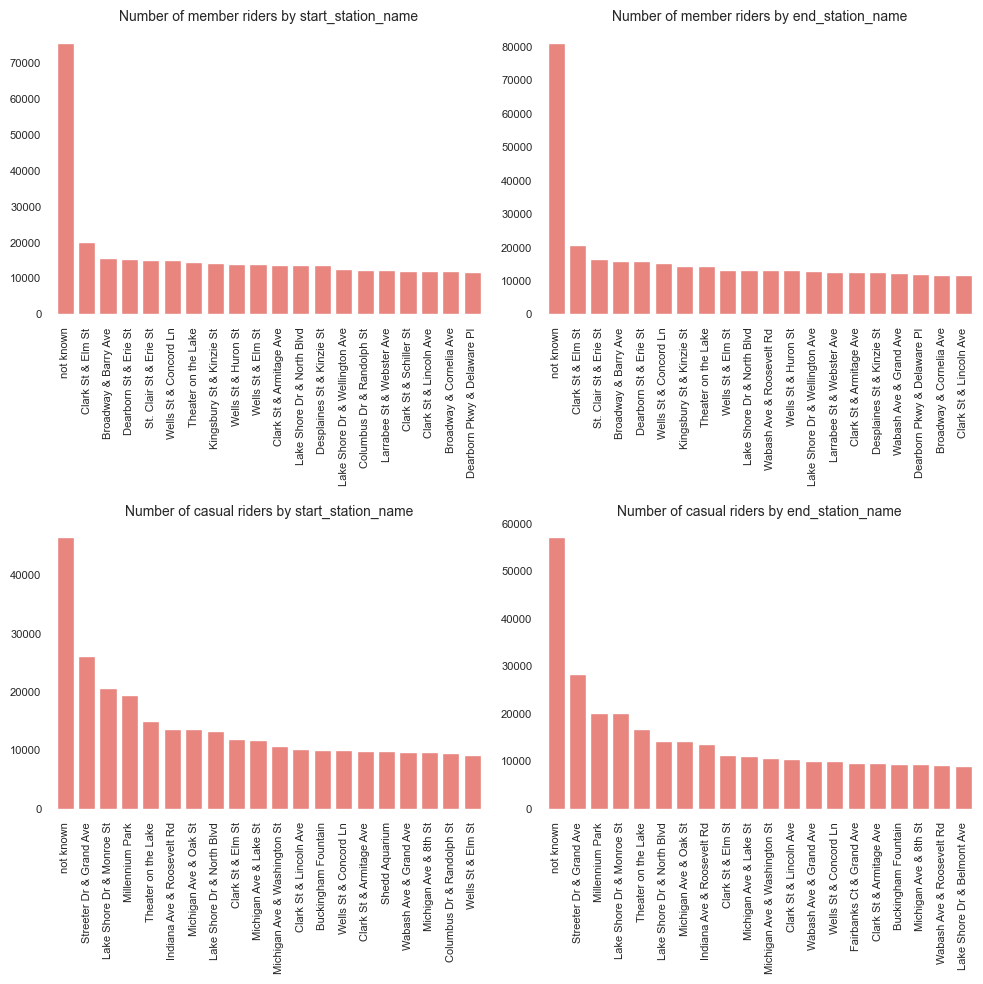

In [22]:
grouped_data = data.groupby(
    'member_casual', observed=True
)
member_data = grouped_data.get_group('member')
casual_data = grouped_data.get_group('casual')

def plot_station(station_data, station, name, ax):

    df = station_data.groupby(station, observed=True
                             ).size().to_frame('count'
                             ).reset_index().sort_values(
                              by='count', ascending=False
                             ).head(20)
    
    ax.set_title(f'Number of {name} riders by {station}', fontsize=10)
    
    sns.barplot(x=station,
            y='count',
            data=df,
            color = colors[0],
            ax=ax)
    
    ax.set_xlabel("")
    ax.set_ylabel("")
    ax.tick_params(axis='x', rotation=90)
    plt.tight_layout()

fig, axes = plt.subplots(2, 2, figsize=(10, 10))

plot_station(member_data, "start_station_name", 'member', axes[0, 0])
plot_station(member_data, "end_station_name", 'member', axes[0, 1])
plot_station(casual_data, "start_station_name", 'casual', axes[1, 0])
plot_station(casual_data, "end_station_name", 'casual', axes[1, 1])

Most start and end stations are unknown for both member and casual riders, followed by Streeter Dr & Grand Ave, Clark St & Elm Street.

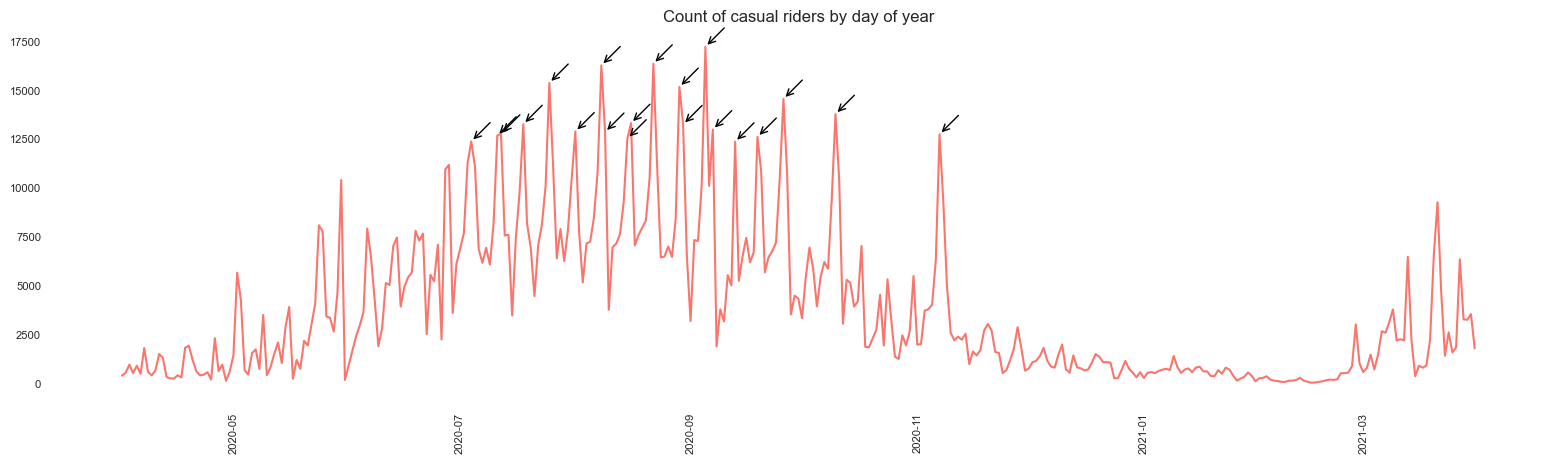

In [23]:
def plot_daily_ride_count(df, start=None, end=None):

    if start:
        df = df[df['started_at'] >= pd.to_datetime(start)]
    if end:
        df = df[df['started_at'] <= pd.to_datetime(end)]

    daily_rides = df.groupby(df['started_at'].dt.date, observed=True).size().to_frame('count').reset_index()
    
    fig, ax = plt.subplots(figsize=(19.2, 4.8))
    sns.lineplot(x='started_at', y='count', data=daily_rides, ax=ax)
    
    plt.title('Count of casual riders by day of year')
    plt.xlabel("")
    plt.ylabel("")
    plt.xticks(rotation=90)

    spikes = daily_rides[daily_rides["count"] > daily_rides["count"].mean() * 3]
    for _, row in spikes.iterrows():
        ax.annotate(
            "",
            xy=(row['started_at'], row["count"]),
            xytext=(15, 15), 
            textcoords="offset points",
            arrowprops=dict(arrowstyle="->", color="black"))

casual_data = data.groupby('member_casual').get_group('casual')
plot_daily_ride_count(casual_data)

There are a few days in the year where the number of daily casual riders is more than thrice the average. We can categorize these dates as:

##### US Major Holidays:

2020-07-04 : Independence Day  
2020-09-07 : Labor Day

##### Summer Weekends (July–September):

2020-07-11  
2020-07-12  
2020-07-18  
2020-07-25  
2020-08-01  
2020-08-08  
2020-08-09  
2020-08-15  
2020-08-16  
2020-08-22  
2020-08-29  
2020-08-30  

##### Mild Autumn Days:

2020-09-05  
2020-09-13  
2020-09-19  
2020-09-26  
2020-10-10  
2020-11-07  

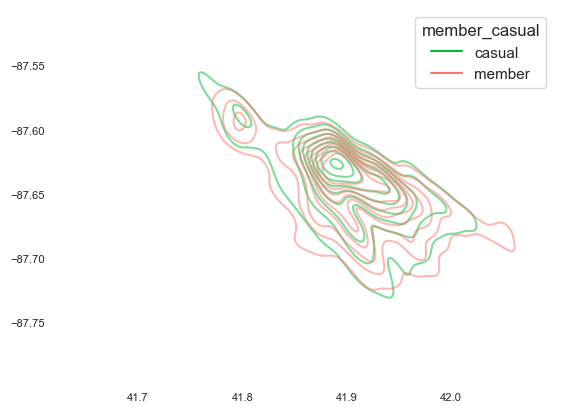

In [24]:
sample_data = data.sample(n=5000)

sns.kdeplot(data=sample_data,
            x="start_lat", 
            y="start_lng", 
            hue="member_casual",
            palette={"member": colors[0], "casual": colors[2]},
            alpha=0.5);
plt.xlabel("")
plt.ylabel("");

As we can see, most rides are booked at or near the shoreline area. We can see this more clearly using a heatmap.

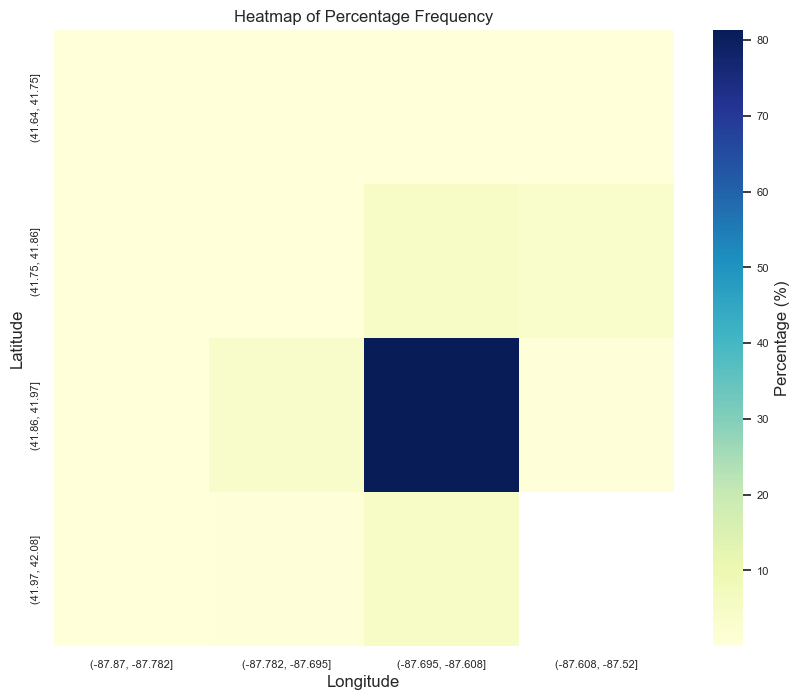

In [25]:

bins_lat = np.linspace(data['start_lat'].min(), data['start_lat'].max(), 5)
bins_lon = np.linspace(data['start_lng'].min(), data['start_lng'].max(), 5)
    
data['lat_bin'] = pd.cut(data['start_lat'], bins=bins_lat)
data['lon_bin'] = pd.cut(data['start_lng'], bins=bins_lon)
    
grid_freq = data.groupby(
    ['lat_bin', 'lon_bin'], observed=True
).size().reset_index(name='count')

grid_freq['percentage'] = (grid_freq['count'] / grid_freq['count'].sum()) * 100
    
heatmap_data = grid_freq.pivot(index='lat_bin', columns='lon_bin', values='percentage')
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', cbar_kws={'label': 'Percentage (%)'}, )
plt.title('Heatmap of Percentage Frequency')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

Around 80 percent of rides are booked inside the coordinates: (41.86, -87.695) and (41.97, -87.608). We can plot a rectangle on a map representing the area between these coordinates.

In [26]:
lat_bounds = data['start_lat'].quantile([0.10, 0.90])
lon_bounds = data['start_lng'].quantile([0.10, 0.90])
    
rectangle_coordinates = [[
lat_bounds.loc[0.10],
lon_bounds.loc[0.10]],
[lat_bounds.loc[0.90],
lon_bounds.loc[0.90],
]]

m = folium.Map(
    location=(41.8781, -87.6298),
    width='75%',
    height='90%',
    zoom_start=12
)

samp = data.sample(100)

for index, row in samp.iterrows():
    if row['member_casual'] == 'member':
        folium.Marker(
        location=[row['start_lat'], row['start_lng']],
        popup="Mt. Hood Meadows",
        icon=folium.Icon(color='green')
        ).add_to(m)

    if row['member_casual'] == 'casual':
        folium.Marker(
        location=[row['start_lat'], row['start_lng']],
        popup="Mt. Hood Meadows",
        icon=folium.Icon(color='red')
        ).add_to(m)

folium.Rectangle(
    bounds=rectangle_coordinates,
    line_join="round",
    dash_array="5, 5",
    fill_color='red',
    color='red'
).add_to(m)

m

# Communicating Results

### Optimizing Campaign Timing and Locations Based on Rider Activity

- Riders tend to be most active in the evenings, making this the ideal time to run campaigns and initiatives.

- While member riders show consistent levels of activity throughout the week, casual riders exhibit significantly higher activity on weekends compared to weekdays. Therefore, scheduling campaigns over the weekend can help save both time and resources.

- Casual riders are most active during the summer months—particularly in July, August, and September. Focusing campaigns and initiatives during this period can further improve efficiency and effectiveness.

- Targeting stations where casual riders are most active—such as Streeter Dr & Grand Ave, Lake Shore Dr & Monroe St, and Millennium Park—can significantly enhance campaign impact.

- There are specific days in the summer when rider counts are up to three times higher than average. These high-traffic days are typically summer weekends, national holidays, and mild autumn days. Launching campaigns during these peak days can maximize outreach.

- Lastly, a majority of rides—approximately 80%—originate from or near beachside stations. Concentrating campaign efforts solely in this bay area can prove to be both time-saving and resource-efficient.